# Hierarchical clustering analysis

In [1]:
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset
df_01_scaled = pd.read_csv('../data/HR_comma_sep_01_scaled.csv', index_col=0)

In [3]:
# choice of attributes
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
train_data = df_01_scaled[numerical_features].values

In [4]:
# distance matrix
data_dist = pdist(train_data, metric='euclidean')

In [5]:
# compute hierarchical clustering
methods = ['single', 'complete', 'average', 'centroid']
data_links = dict()
for m in methods:
    data_links[m] = linkage(data_dist, method=m, metric='euclidean')
#data_link = linkage(data_dist, method='single', metric='euclidean')

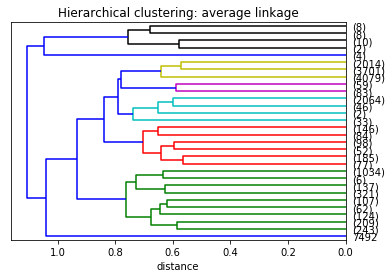

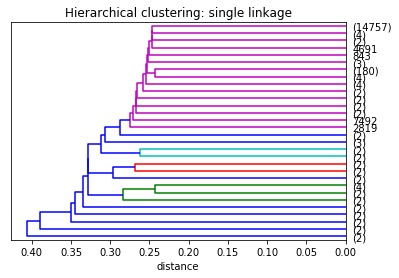

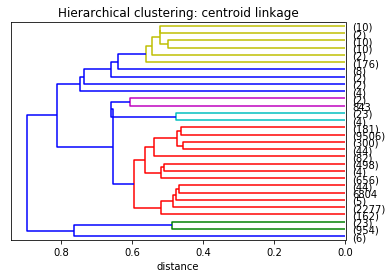

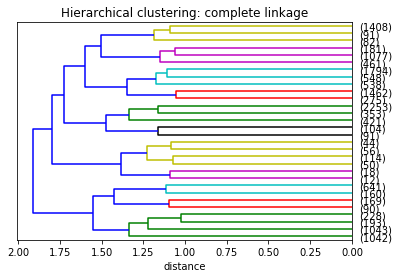

In [6]:
# plot dendograms
for method in data_links:
    res = dendrogram(data_links[method], truncate_mode='lastp', orientation='left')#, no_labels=False) #p=lev to show, truncate_mode=lastp/lavel
    plt.xlabel('distance')
    plt.title('Hierarchical clustering: ' + method + ' linkage')
    plt.savefig('../images/hierarchical_clustering_' + method + '.png')
    plt.show()
# TODO: print number of singleton clusters